<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/main/Regression_With_a_Mohs_Hardness_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [13]:
train=pd.read_csv('/train.csv')
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [14]:
test = pd.read_csv('/test.csv')
test.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [15]:
submission = pd.read_csv('/sample_submission.csv')
submission.head()

,id,Hardness
0,10407,4.647
1,10408,4.647
2,10409,4.647
3,10410,4.647
4,10411,4.647


# TANIMLAR
**allelectrons_Total: Total number of electrons(toplam elektron sayısı)**

**density_Total: Total elemental density(toplam element yoğunluğu)**

**allelectrons_Average: Atomic average number of Electrons(elektron sayısının atomik ortalaması)**

**val_e_Average: Atomic average number of valence electrons(değerlik elektronların atomik ortalama sayısı)**

**atomicweight_Average: Atomic average of atomic weight(atom ağırlığının atomik ortalaması)**

**ionenergy_Average: Atomic average first ioenergy(birinci ioenerjinin atomik ortalaması)**

**el_neg_chi_Average: Atomic average of Pauling electronegativity of the most common oxidation state(en sık görülen oksidayson durumunun Pauling elektronegatifliğinin atomik ortalaması)**

**R_vdw_element_Average: Atomic average of van der Waals atomic radius(Van der Waals atomik yarıçapının atomik ortalaması)**

**R_cov_element_Average: Atomic average of covalent atomic radius(Covalent atom yarıçapının atomik ortalaması)**

**zaratio_Average: Atomic average of atomic number to mass number ratio(atom numarısının kütle numarasına oranının atomik ortalaması)**

**density_Average: Atomic average of elemental density(element yoğunlunun atomik ortalaması)**

**Hardness: Mohs hardness (target)(Mohs sertliği)**

---


In [16]:
#Control the status of null values.
train.isna().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

# New section

In [19]:
##We need to control the data types to find true type inconsistencies.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [20]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [21]:
#id column will be deleted if we don't have any work.id will be used in the submission file
train=train.drop(['id'],axis=1)
train.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


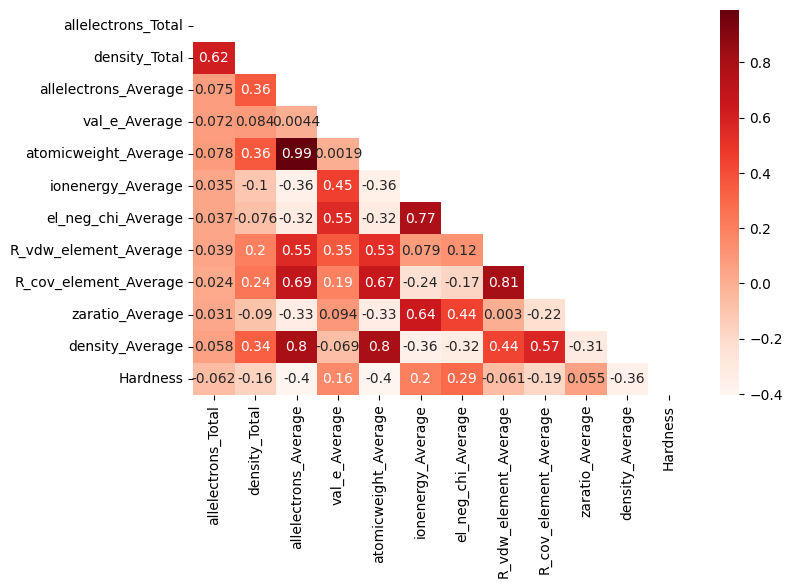

In [22]:
#We need to examine the correlation between them via Heatmap
plt.figure(figsize=(8,5))
corr=train.corr()
sns.heatmap(corr,annot=True,cmap='Reds',mask=np.triu(corr))
plt.show()

**The highest correlation is between allelectrons_Average and atomicweight_Average.**

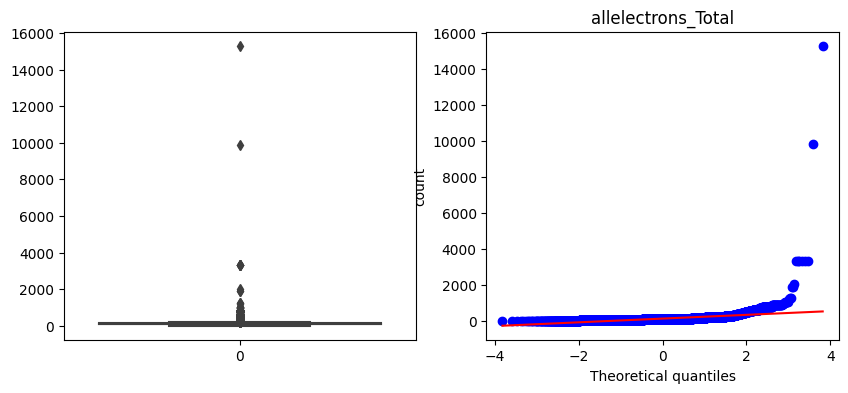

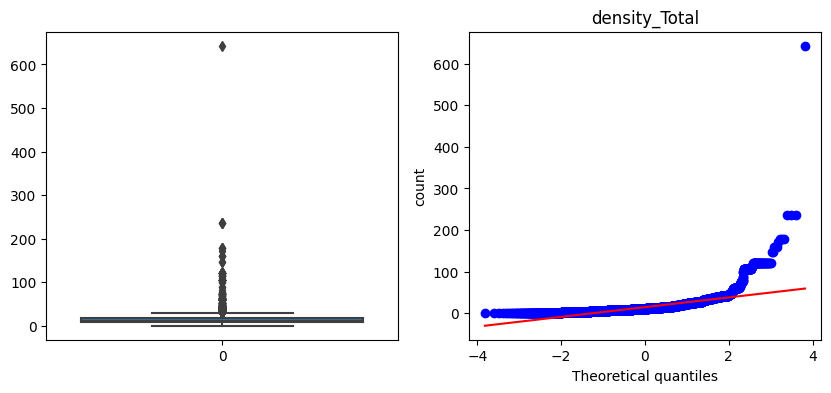

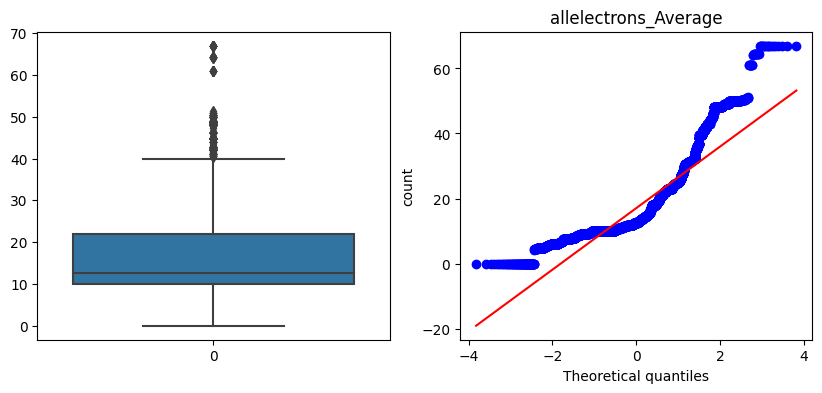

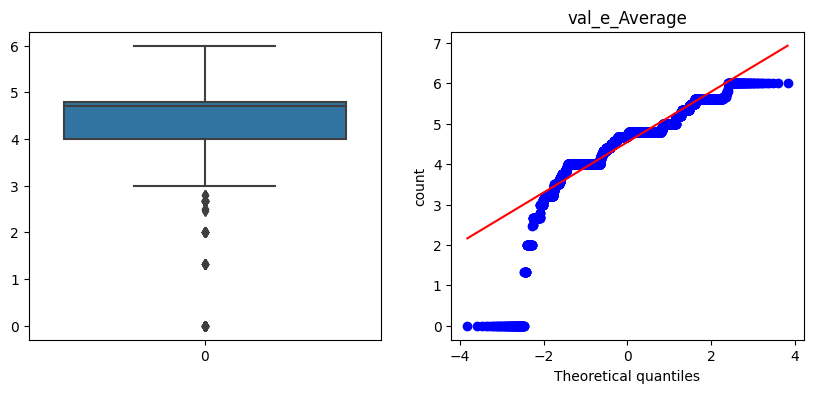

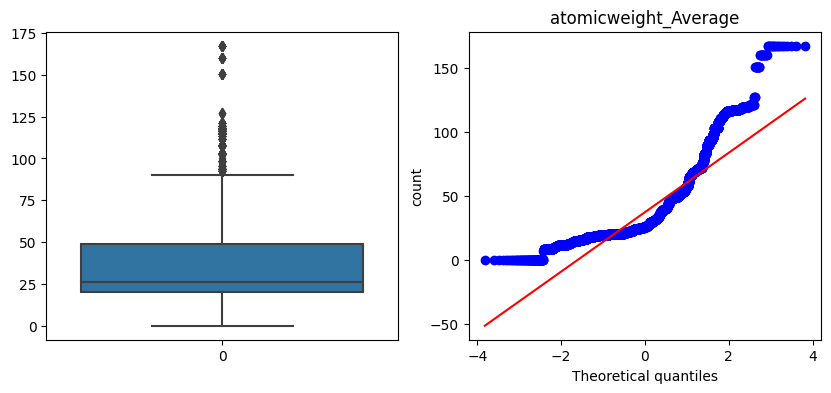

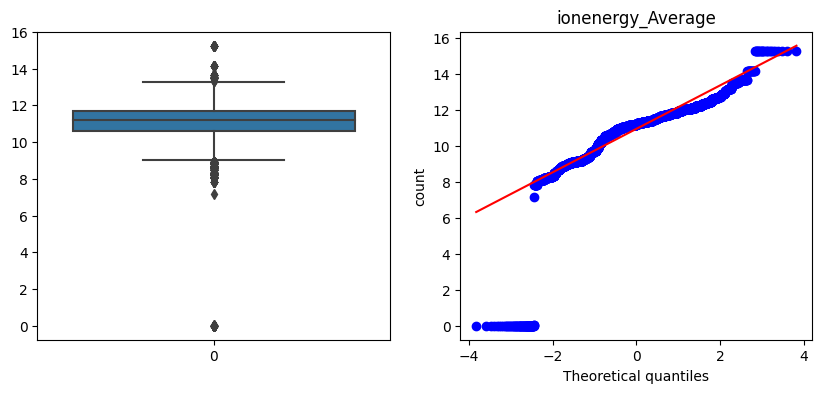

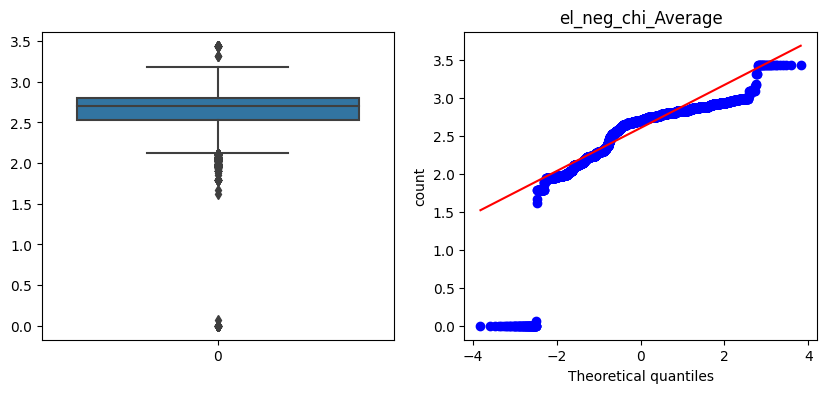

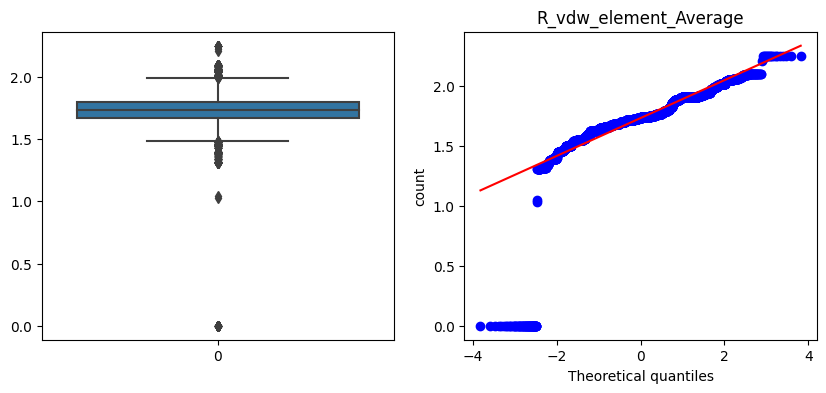

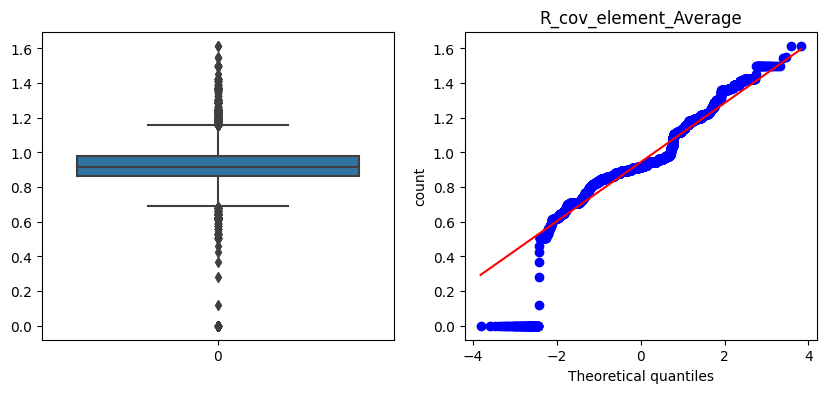

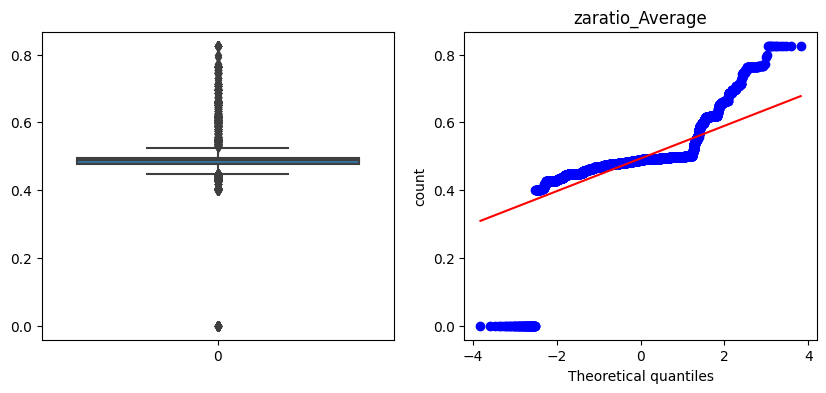

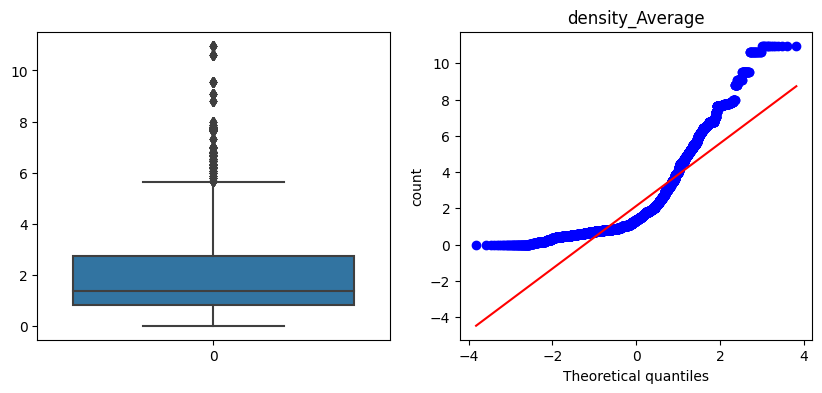

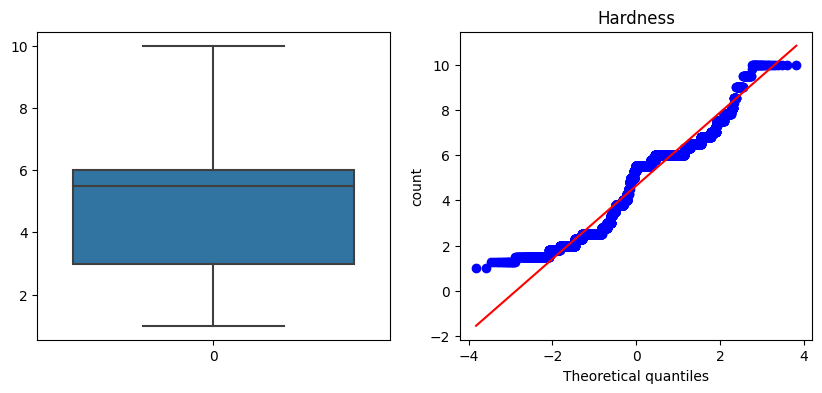

In [23]:
##Outliers:
for feature in train:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.boxplot(train[feature])
        plt.subplot(1,2,2)
        stat.probplot(train[feature],dist='norm',plot=pylab)
        plt.ylabel('count')
        plt.title(feature)
plt.show()

In [24]:
list(train)


['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness']

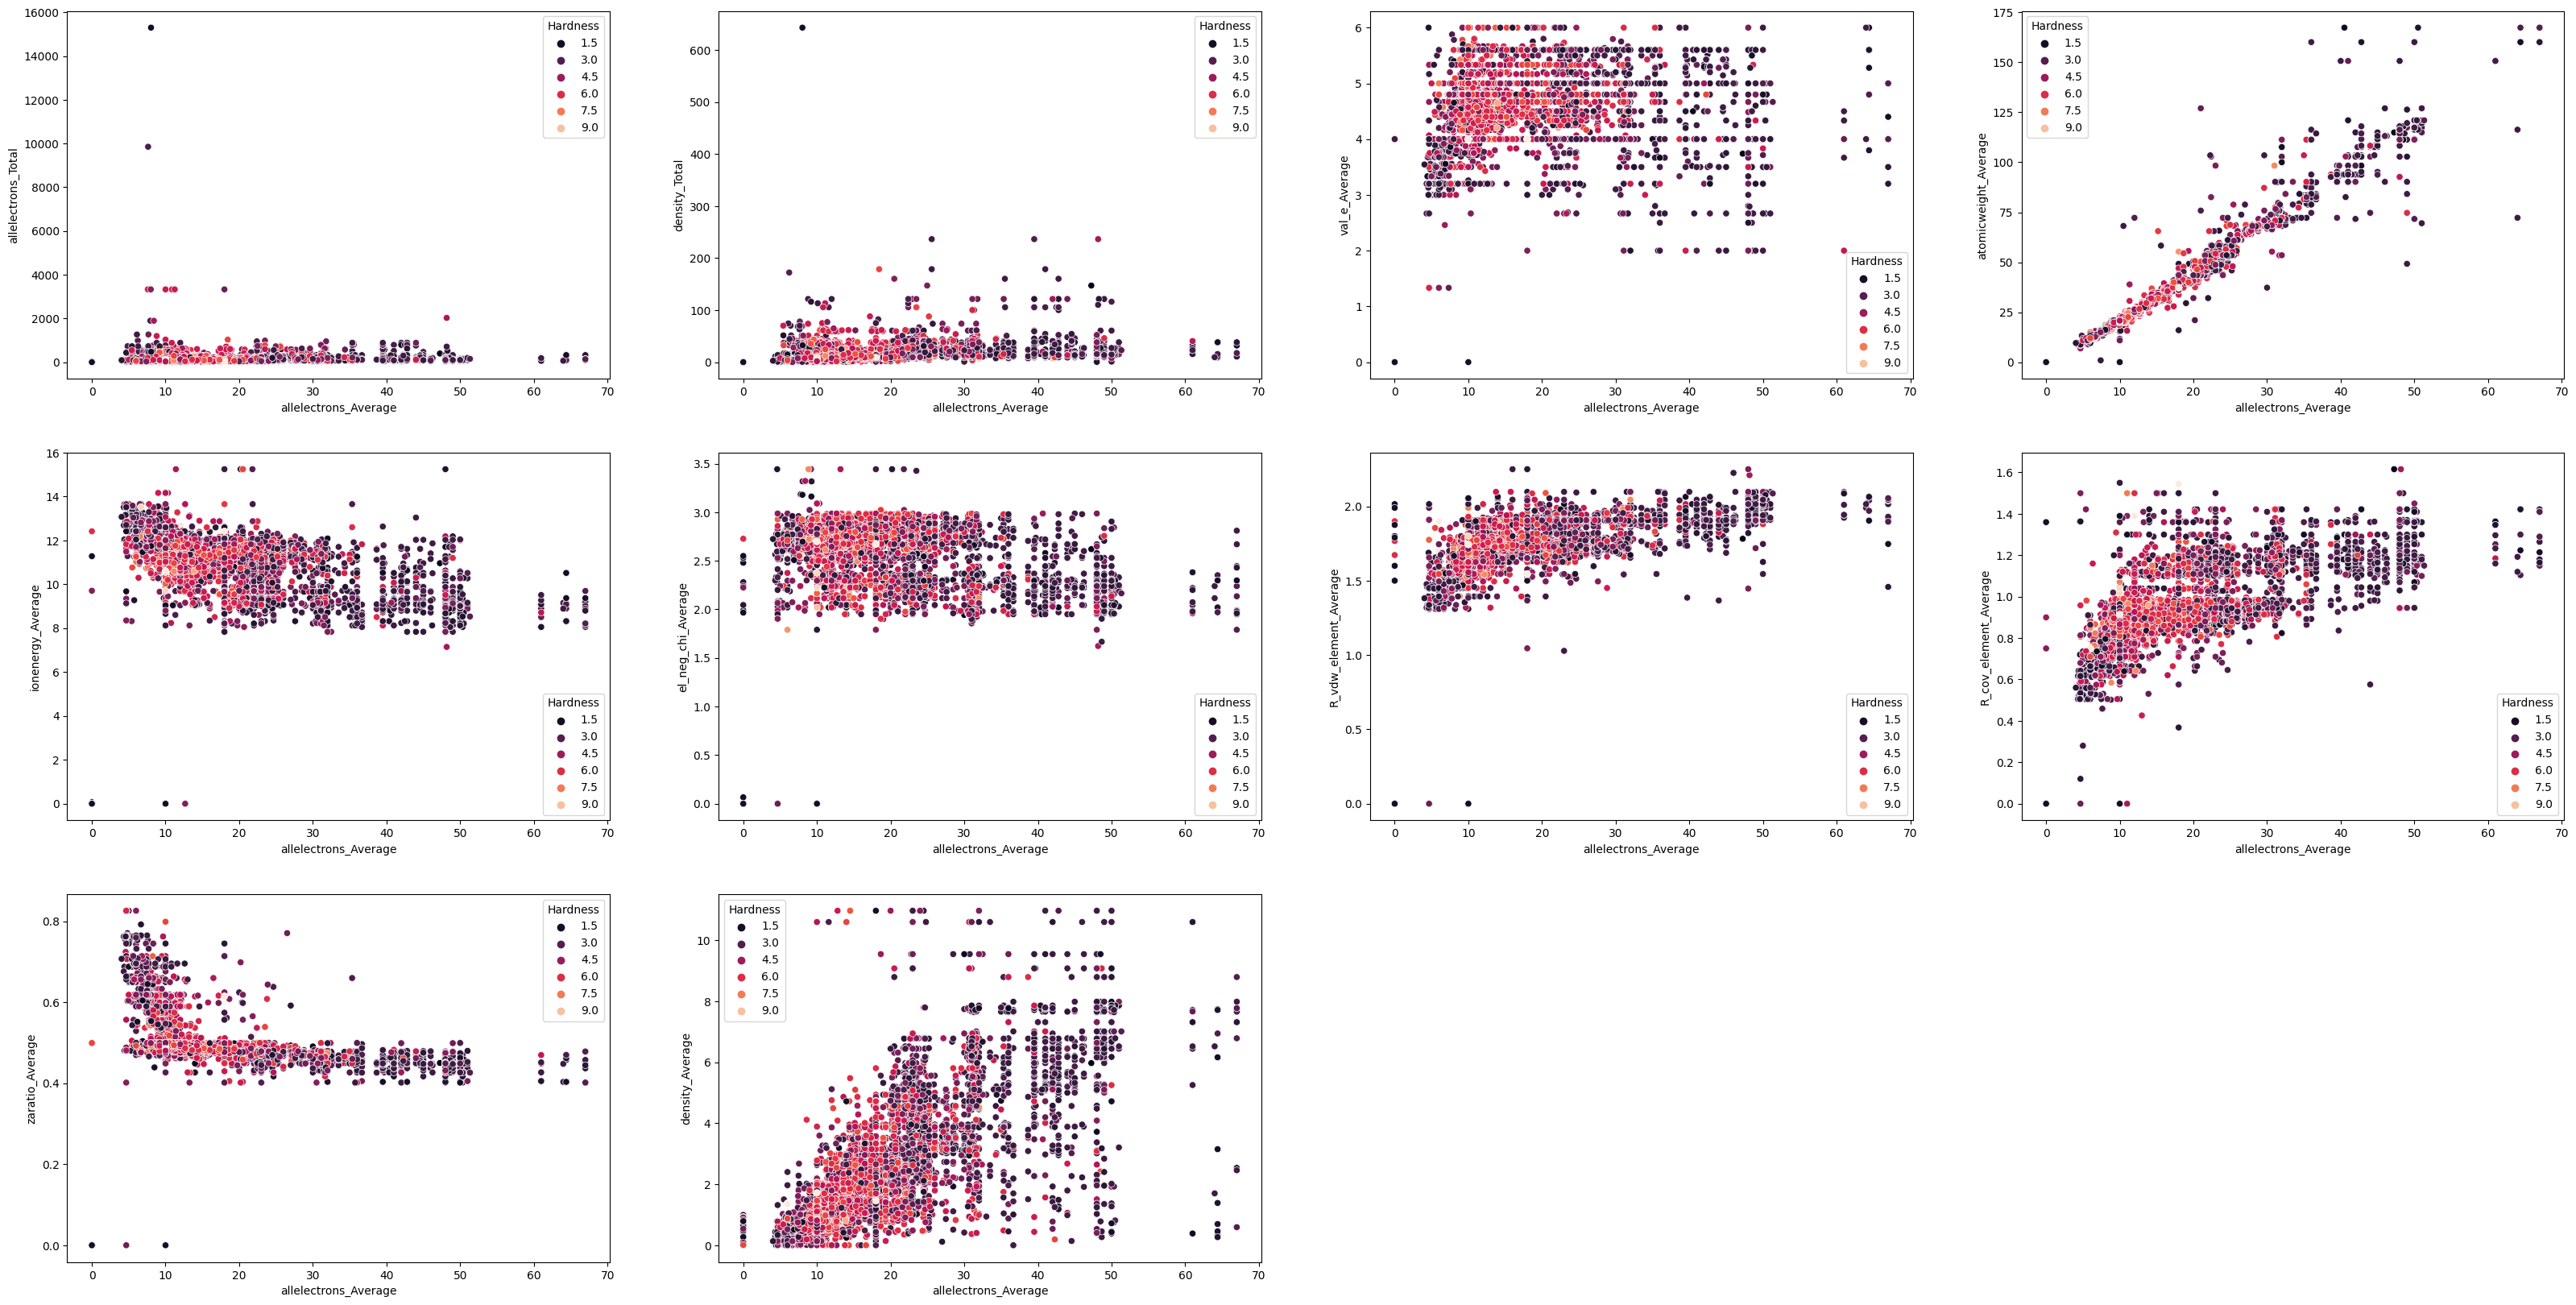

In [25]:
outliers=['allelectrons_Total','density_Total','val_e_Average','atomicweight_Average','ionenergy_Average','el_neg_chi_Average',
    'R_vdw_element_Average','R_cov_element_Average','zaratio_Average','density_Average']
plt.figure(figsize=(40,70),facecolor='white')
plotnumber=1
for feature in outliers:
    ax=plt.subplot(10,4,plotnumber)
    b=sns.scatterplot(train, x='allelectrons_Average', y=feature,hue='Hardness',legend=True,palette='rocket')
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=6, xytext=(0, 6),textcoords='offset points')

**Outliers Cleaning Process (the most appropriate method is to replace them with mean or median values)**

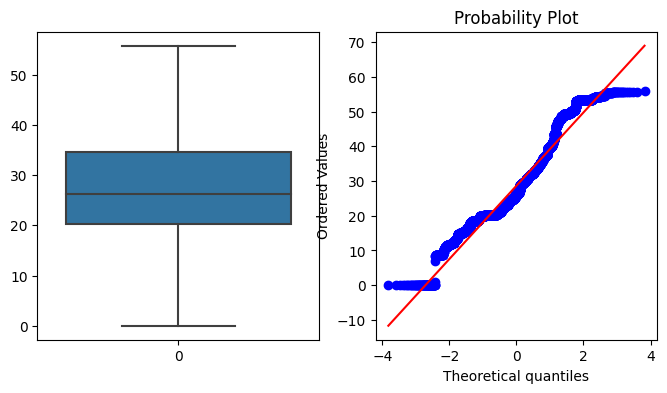

In [29]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0
for i in train['atomicweight_Average']:
        q1=train['atomicweight_Average'].quantile(0.25)
        q3=train['atomicweight_Average'].quantile(0.75)
        iqr=q3-q1
        low=q1-1.5*iqr
        upp=q3+1.5*iqr
        if i >upp or i < low:
            train['atomicweight_Average']=train['atomicweight_Average'].replace(i,np.mean(train['atomicweight_Average']))
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(train['atomicweight_Average'])
plt.subplot(1,2,2)
stat.probplot(train['atomicweight_Average'],dist='norm',plot=pylab)
plt.show()

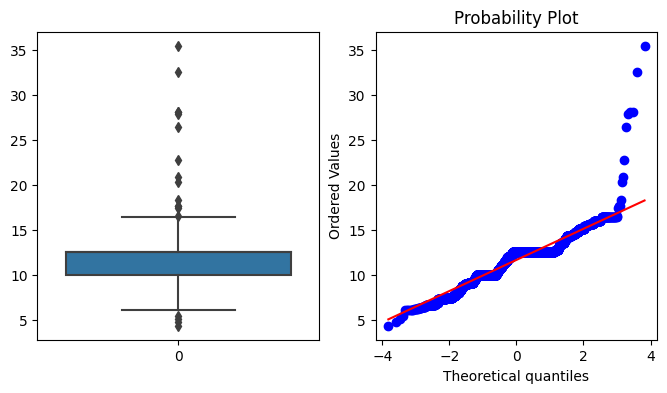

In [30]:
for i in train['allelectrons_Average']:
        q1=train['allelectrons_Average'].quantile(0.25)
        q3=train['allelectrons_Average'].quantile(0.75)
        iqr=q3-q1
        low=q1-1.5*iqr
        upp=q3+1.5*iqr
        if i >upp or i < low:
            train['allelectrons_Average']=train['allelectrons_Average'].replace(i,np.median(train['allelectrons_Average']))
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(train['allelectrons_Average'])
plt.subplot(1,2,2)
stat.probplot(train['allelectrons_Average'],dist='norm',plot=pylab)
plt.show()

In [31]:
train.describe()


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,11.713248,4.546789,28.653790,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,1.830727,0.690864,10.856397,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,12.600000,4.800000,34.645671,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,35.517241,6.000000,55.806769,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [32]:
##The dataset to be compared is Submission data
X = train.iloc[:6939, 1:-1].values
y = submission.iloc[:6939, -1].values

In [33]:
print(X)

[[ 0.841611   10.          4.8        ...  0.86        0.49607
   0.91457   ]
 [ 7.558488   10.          4.8        ...  0.91        0.492719
   0.7176    ]
 [ 8.885992   15.6         5.6        ...  0.864       0.481478
   1.50633   ]
 ...
 [ 1.7        12.6         4.         ...  1.5         0.49954
   0.33885   ]
 [ 1.74316    10.          5.33333333 ...  0.86666667  0.48039
   0.82753   ]
 [16.676996   12.6         5.6        ...  0.88        0.486236
   3.57614   ]]


In [34]:
print(y)

[4.647 4.647 4.647 ... 4.647 4.647 4.647]


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [36]:
# We will scale X_train and X_test
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

In [37]:
print(X_train)

[[-9.88893973e-01  4.54402608e-01 -8.00187617e-01 ... -5.27605556e+00
  -8.36008403e+00 -6.55311334e-01]
 [-3.69807494e-01  1.35442582e-01  3.78095625e-01 ... -9.17796607e-01
  -2.77430868e-02 -2.16644794e-01]
 [ 2.26712634e-01 -6.61957482e-01  3.04452923e-01 ... -9.36155702e-03
  -7.48867992e-03 -7.08125681e-01]
 ...
 [-2.23356073e-02  4.54402608e-01 -3.09236266e-01 ...  1.41180984e+00
  -5.12814945e-01  6.75766644e-02]
 [ 1.34263239e+00  4.54402608e-01  1.55637887e+00 ...  1.32263830e+00
  -7.77647670e-01  2.32265851e+00]
 [-3.69807494e-01  2.41762591e-01  3.78095625e-01 ... -2.15570740e-01
  -2.77430868e-02 -1.69376004e-01]]


In [39]:
print(X_test)

[[-0.55903551 -1.81375757 -2.27304167 ... -1.24475891  4.26763468
  -0.77176289]
 [-0.63516923  0.98600265  0.37809563 ... -0.11525276 -0.00884462
  -0.56680423]
 [-0.38650598  0.93284265 -0.80018762 ... -0.00936156 -0.00884462
  -0.10848836]
 ...
 [-0.3848975   2.04920274  1.55637887 ... -0.46079247 -0.19937164
  -0.32562662]
 [-0.65196971 -2.03348559 -0.50561681 ... -1.33021497  1.77974662
  -0.75946981]
 [-0.18179735  0.13544258  0.37809563 ... -0.73388031 -0.02648884
  -0.42285186]]


In [40]:
 print(y_train)

[4.647 4.647 4.647 ... 4.647 4.647 4.647]


In [41]:
#y_train data will be converted to a 2D array.
y_train = y_train.reshape(len(y_train), 1)
print(y_train)

[[4.647]
 [4.647]
 [4.647]
 ...
 [4.647]
 [4.647]
 [4.647]]


In [42]:
#y_train is scaled after conversion to a 2D array.
scale_y = StandardScaler()
y_train = scale_y.fit_transform(y_train)
print(y_train)

[[8.8817842e-16]
 [8.8817842e-16]
 [8.8817842e-16]
 ...
 [8.8817842e-16]
 [8.8817842e-16]
 [8.8817842e-16]]


In [43]:
#The algorithm will be converted to its original form before applying
y_train = y_train.reshape(len(y_train))
print(y_train)

[8.8817842e-16 8.8817842e-16 8.8817842e-16 ... 8.8817842e-16 8.8817842e-16
 8.8817842e-16]


In [44]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [45]:
#y_pred will be restored to its original state before calculating the performance of the model
y_pred = regressor.predict(X_test)
print(y_pred)

[8.8817842e-16 8.8817842e-16 8.8817842e-16 ... 8.8817842e-16 8.8817842e-16
 8.8817842e-16]


In [46]:
y_pred = y_pred.reshape(len(y_pred), 1)
print(y_pred)

[[8.8817842e-16]
 [8.8817842e-16]
 [8.8817842e-16]
 ...
 [8.8817842e-16]
 [8.8817842e-16]
 [8.8817842e-16]]


In [47]:

#returning to original scale
y_pred = scale_y.inverse_transform(y_pred)
print(y_pred)

[[4.647]
 [4.647]
 [4.647]
 ...
 [4.647]
 [4.647]
 [4.647]]


In [48]:
y_pred = y_pred.reshape(len(y_pred))
print(y_pred)

[4.647 4.647 4.647 ... 4.647 4.647 4.647]


In [49]:
y_pred_df = pd.DataFrame(data=y_pred, columns=["Estimated_Hardness"])
y_pred_df.head(10)

,Estimated_Hardness
0,4.647
1,4.647
2,4.647
3,4.647
4,4.647
5,4.647
6,4.647
7,4.647
8,4.647
9,4.647


In [50]:
y_test_df = pd.DataFrame(data=y_test, columns=["Reel_Hardness"])
y_test_df.head(10)

,Reel_Hardness
0,4.647
1,4.647
2,4.647
3,4.647
4,4.647
5,4.647
6,4.647
7,4.647
8,4.647
9,4.647


In [51]:
compare_df = y_pred_df.merge(y_test_df, how="left", left_index=True, right_index=True)
compare_df

,Estimated_Hardness,Reel_Hardness
0,4.647,4.647
1,4.647,4.647
2,4.647,4.647
3,4.647,4.647
4,4.647,4.647
...,...,...
4159,4.647,4.647
4160,4.647,4.647
4161,4.647,4.647
4162,4.647,4.647


In [52]:
result_df = submission.merge(y_pred_df, how="right", left_index=True, right_index=True)
result_df

,id,Hardness,Estimated_Hardness
0,10407,4.647,4.647
1,10408,4.647,4.647
2,10409,4.647,4.647
3,10410,4.647,4.647
4,10411,4.647,4.647
...,...,...,...
4159,14566,4.647,4.647
4160,14567,4.647,4.647
4161,14568,4.647,4.647
4162,14569,4.647,4.647


In [53]:
from sklearn.metrics import mean_absolute_error
MAE= mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MSE):", MAE)

Mean Absolute Error (MSE): 0.0


0.5

In [55]:
from sklearn.metrics import mean_absolute_error
MAE= mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MSE):", MAE)

Mean Absolute Error (MSE): 0.0


**1. why have you chosen ONLY "allelectrons_Average" and "atomicweight_Average" for removing outliers ?  is it because of high correlation and why?**

 Highest correlation is between **allelectrons_Average** and **atomicweight_Average**. The outlier process was applied to all data.But the result of the data is incorrect, I will revise it and add it again.Some regression and classification models are sensitive to outliers, so it would be more useful to set them equal to the minimum and maximum values.